In [62]:
# Load libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder
)

In [43]:
# Load dataset
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [45]:
# Inspect
print('ORIGINAL DATA')
print(train_df.count())

ORIGINAL DATA
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [46]:
print(test_df.count())

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


In [47]:
print(train_df.sample(5))

     PassengerId  Survived  Pclass                                       Name  \
73            74         0       3                Chronopoulos, Mr. Apostolos   
685          686         0       2     Laroche, Mr. Joseph Philippe Lemercier   
526          527         1       2                       Ridsdale, Miss. Lucy   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   
456          457         0       1                  Millet, Mr. Francis Davis   

        Sex   Age  SibSp  Parch         Ticket     Fare Cabin Embarked  
73     male  26.0      1      0           2680  14.4542   NaN        C  
685    male  25.0      1      2  SC/Paris 2123  41.5792   NaN        C  
526  female  50.0      0      0    W./C. 14258  10.5000   NaN        S  
829  female  62.0      0      0         113572  80.0000   B28      NaN  
456    male  65.0      0      0          13509  26.5500   E38        S  


In [48]:
print(test_df.sample(5))

     PassengerId  Pclass                       Name     Sex   Age  SibSp  \
185         1077       2  Maybery, Mr. Frank Hubert    male  40.0      0   
348         1240       2           Giles, Mr. Ralph    male  24.0      0   
82           974       1     Case, Mr. Howard Brown    male  49.0      0   
156         1048       1          Bird, Miss. Ellen  female  29.0      0   
55           947       3       Rice, Master. Albert    male  10.0      4   

     Parch    Ticket      Fare Cabin Embarked  
185      0    239059   16.0000   NaN        S  
348      0    248726   13.5000   NaN        S  
82       0     19924   26.0000   NaN        S  
156      0  PC 17483  221.7792   C97        S  
55       1    382652   29.1250   NaN        Q  


# EXP 1 - Less columns and delete NAN values.

Train set after dropping NaN values:
(714, 6) (331, 6)
           Pclass         Sex         Age       SibSp       Parch        Fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     2.236695    0.365546   29.699118    0.512605    0.431373   34.694514
std      0.838250    0.481921   14.526497    0.929783    0.853289   52.918930
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%      1.000000    0.000000   20.125000    0.000000    0.000000    8.050000
50%      2.000000    0.000000   28.000000    0.000000    0.000000   15.741700
75%      3.000000    1.000000   38.000000    1.000000    1.000000   33.375000
max      3.000000    1.000000   80.000000    5.000000    6.000000  512.329200
           Pclass         Sex         Age       SibSp       Parch        Fare
count  331.000000  331.000000  331.000000  331.000000  331.000000  331.000000
mean     2.141994    0.383686   30.181269    0.483384    0.398792   40.982087
std      

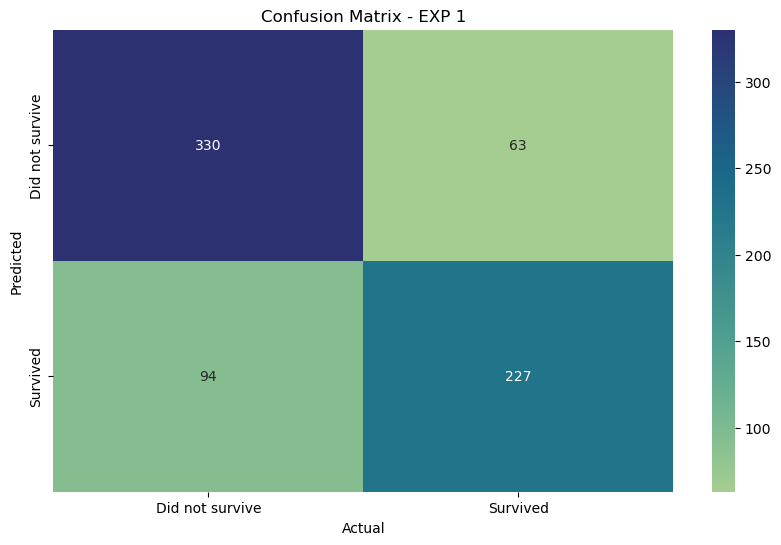

In [53]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = train_df[manual_selected_features].copy()
y_train = train_df.loc[X_train.dropna().index, 'Survived'] # Ensure that the target is aligned with the features

X_test = test_df[manual_selected_features].copy()
# y_test = test_df.loc[X_test.dropna().index, 'Survived'] # Ensure that the target is aligned with the features

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Then we drop nan values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Inspect again
print('Train set after dropping NaN values:')
print(X_train.shape, X_test.shape)
print('==' * 42)
print(X_train.describe(include='all'))
print('==' * 42)
print(X_test.describe(include='all'))

# Try directly
sgdc = SGDClassifier(loss='log_loss')
sgdc.fit(X_train, y_train)
print('Model score is: ', sgdc.score(X_train, y_train))
# print('Model score is: ', sgdc.score(X_test, y_test))

# Visually verify
# Prepare data for confusion matrix
sgdc_predictions = sgdc.predict(X_train)
cm = pd.crosstab(sgdc_predictions, y_train, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 1')
plt.show()

# EXP 2 - Try to keep more features and row values giving them another treatment


Train set after handling NaN values:
(891, 6) (418, 6) (891,)
           Pclass         Sex         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642    0.352413   29.699118    0.523008    0.381594   32.204208
std      0.836071    0.477990   13.002015    1.102743    0.806057   49.693429
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000    0.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000    0.000000   29.699118    0.000000    0.000000   14.454200
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.000000
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200
           Pclass         Sex         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550    0.363636   30.272590    0.447368    0.392344   35.576535
st

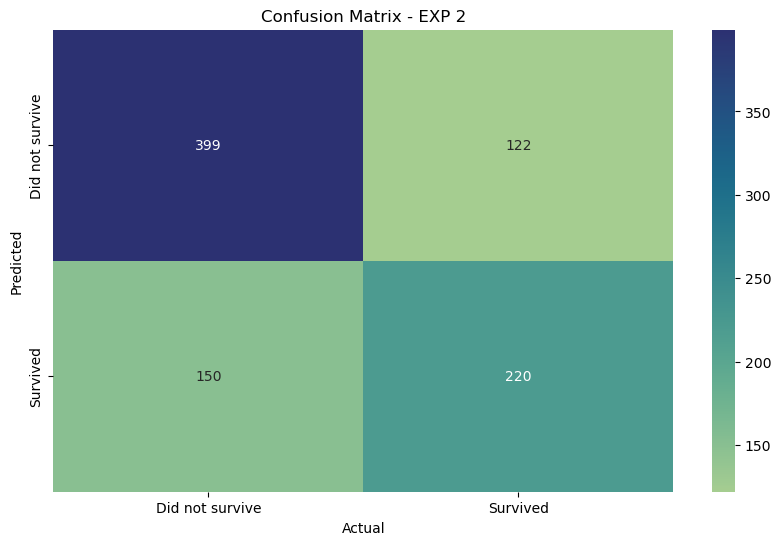

In [55]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = train_df[manual_selected_features].copy()
y_train = train_df['Survived'] # Ensure that the target is aligned with the features

X_test = test_df[manual_selected_features].copy()
# y_test = target_df['Survived'] # Ensure that the target is aligned with the features

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Fill Age NaN values with the mean
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# Fill Fare NaN values with the median
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# Inspect again
print('Train set after handling NaN values:')
print(X_train.shape, X_test.shape, y_train.shape)
print('==' * 42)
print(X_train.describe(include='all'))
print('==' * 42)
print(X_test.describe(include='all'))

# Train model
sgdc = SGDClassifier(loss='log_loss')
sgdc.fit(X_train, y_train)
print('Model score is: ', sgdc.score(X_train, y_train))

# Visually verify
sgdc_predictions = sgdc.predict(X_train) # Prepare data for confusion matrix
cm = pd.crosstab(sgdc_predictions, y_train, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 2')
plt.show()

# Generate prediction file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': sgdc.predict(X_test)
})
submission.to_csv('out/submission_exp_2.csv', index=False)

# EXP 3 - Applying KFold to EXP2

Model score is:  0.7061068702290076
Model score is:  0.7175572519083969
Model score is:  0.6946564885496184
Model score is:  0.7862595419847328
Model score is:  0.7241379310344828
Mean error across folds: 0.2742563832587523
Confusion Matrix:


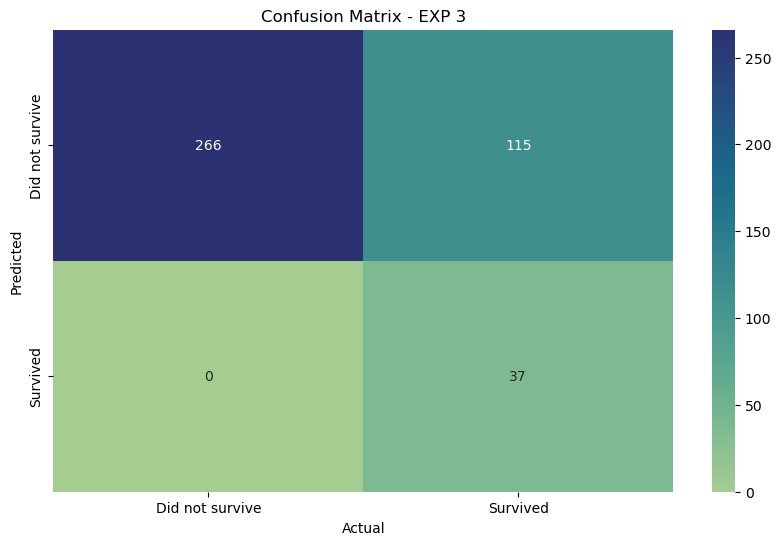

In [ ]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = train_df[manual_selected_features].copy()
y_train = train_df['Survived'] # Ensure that the target is aligned with the features

X_test = test_df[manual_selected_features].copy()
y_test = target_df['Survived'] # Ensure that the target is aligned with the features

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Fill Age NaN values with the mean
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# Fill Fare NaN values with the median
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Combine X_train and X_test into a single DataFrame
combined_X = pd.concat([X_train, X_test], keys=['train', 'test'])
combined_y = pd.concat([y_train, y_test], keys=['train', 'test'])

m_error = []
for train_index, val_index in kf.split(combined_X, combined_y):
    X_train_fold, X_val_fold = combined_X.iloc[train_index], combined_X.iloc[val_index]
    y_train_fold, y_val_fold = combined_y.iloc[train_index], combined_y.iloc[val_index]

    sgdc = SGDClassifier(loss='log_loss')
    sgdc.fit(X_train_fold, y_train_fold)
    m_error.append(1 - sgdc.score(X_val_fold, y_val_fold))  # Store the error for each fold
    print('Model score is: ', sgdc.score(X_val_fold, y_val_fold))

print('Mean error across folds:', sum(m_error) / len(m_error))

# Visually verify
sgdc_predictions = sgdc.predict(X_test) # Prepare data for confusion matrix
cm = pd.crosstab(sgdc_predictions, y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 3')
plt.show()

# EXP 4 - Apply scalers, transformers, and normalizers to the data

Final train set:
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Age', 'Fare'],
      dtype='object')
Final test set:
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Age', 'Fare'],
      dtype='object')
Mean Cross Validation Score: 0.7946017199171427
Confusion Matrix:


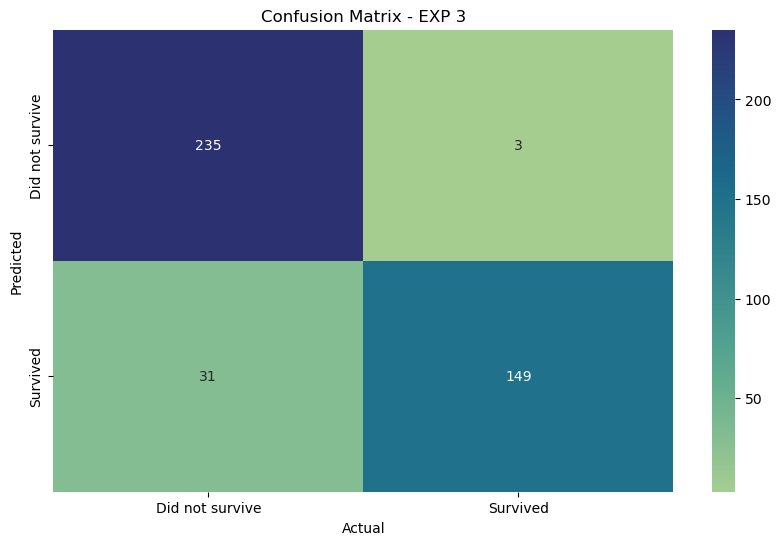

In [ ]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_train = train_df[manual_selected_features].copy()
y_train = train_df['Survived'] # Ensure that the target is aligned with the features

X_test = test_df[manual_selected_features].copy()
y_test = target_df['Survived'] # Ensure that the target is aligned with the features

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Fill Age NaN values with the mean
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# Fill Fare NaN values with the median
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# Create the minmax scaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical features
X_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_scaled = pd.DataFrame(minmax_scaler.transform(X_test[numerical_features]), columns=numerical_features)

# One-hot encode the categorical features
oneHot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oneHot.fit(X_train[categorical_features])

features_names = oneHot.get_feature_names_out(categorical_features)

X_train_encoded = pd.DataFrame(oneHot.transform(X_train[categorical_features]), columns=features_names)
X_test_encoded = pd.DataFrame(oneHot.transform(X_test[categorical_features]), columns=features_names)

# Build the final train and test sets
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Inspect final data
print('Final train set:')
print(X_train_final.columns)
print('Final test set:')
print(X_test_final.columns)

# Train model
scores = [] # List to store scores for each iteration
# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True)

for train_index, val_index in kf.split(X_train_final, y_train):
    # Split the data into training and validation folds
    X_train_fold, X_val_fold = X_train_final.iloc[train_index], X_train_final.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # Initialize the model
    sgdc = SGDClassifier(loss='log_loss')
    # Train the model
    sgdc.fit(X_train_fold, y_train_fold)
    # Evaluate the model
    scores.append(sgdc.score(X_val_fold, y_val_fold))

print('Mean Cross Validation Score:', sum(scores) / len(scores))

# Visually verify
sgdc_predictions = sgdc.predict(X_test_final) # Prepare data for confusion matrix
cm = pd.crosstab(sgdc_predictions, y_test, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 4')
plt.show()



<!-- As a note everything up this is probably wrong since it's taking a bad prediction as target for the test data. -->

# EXP 5 - Change model to LinearSVC

SVM Model score is:  0.8013468013468014
Confusion Matrix:


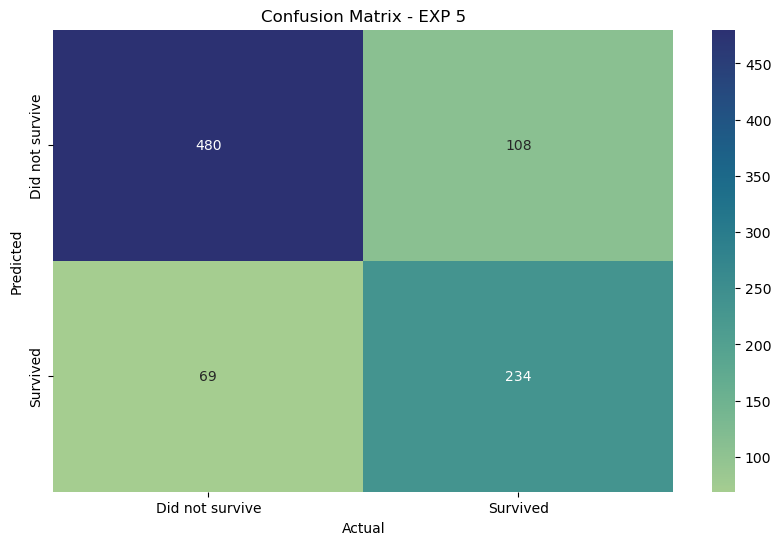

In [ ]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_train = train_df[manual_selected_features].copy()
y_train = train_df['Survived']

X_test = test_df[manual_selected_features].copy()

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Fill Age NaN values with the mean
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# Fill Fare NaN values with the median
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# Create the minmax scaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical features
X_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_scaled = pd.DataFrame(minmax_scaler.transform(X_test[numerical_features]), columns=numerical_features)

# One-hot encode the categorical features
oneHot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oneHot.fit(X_train[categorical_features])

features_names = oneHot.get_feature_names_out(categorical_features)

X_train_encoded = pd.DataFrame(oneHot.transform(X_train[categorical_features]), columns=features_names)
X_test_encoded = pd.DataFrame(oneHot.transform(X_test[categorical_features]), columns=features_names)

# Build the final train and test sets
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_final, y_train)

# Evaluate the model with the training data
svm_model.score(X_train_final, y_train)
print('SVM Model Score is: ', svm_model.score(X_train_final, y_train))

# Visualize the results
svm_predictions = svm_model.predict(X_train_final) # Prepare data for confusion matrix
cm = pd.crosstab(svm_predictions, y_train, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 5')
plt.show()

# Generate prediction file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': svm_model.predict(X_test_final)
})
submission.to_csv('out/submission_exp_5.csv', index=False)


# EXP 6 - Change model to Random Forest (ensemble method)

Random Forest Model Score is:  0.9820426487093153
Confusion Matrix:


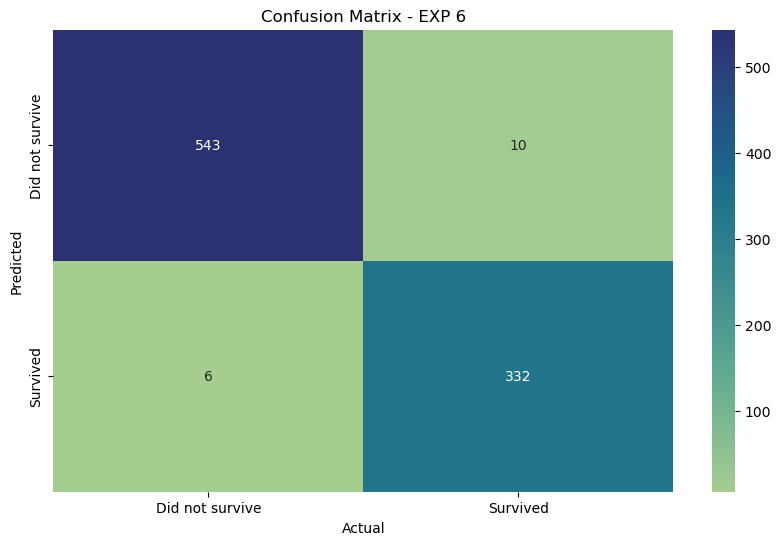

In [83]:
# Select the columns that I feel are important for the model. And create our target.
manual_selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_train = train_df[manual_selected_features].copy()
y_train = train_df['Survived']

X_test = test_df[manual_selected_features].copy()

# Convert 'sex' feature to numerical, 0 for male, 1 for female
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Fill Age NaN values with the mean
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

# Fill Fare NaN values with the median
X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# Create the minmax scaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical features
X_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_scaled = pd.DataFrame(minmax_scaler.transform(X_test[numerical_features]), columns=numerical_features)

# One-hot encode the categorical features
oneHot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oneHot.fit(X_train[categorical_features])

features_names = oneHot.get_feature_names_out(categorical_features)

X_train_encoded = pd.DataFrame(oneHot.transform(X_train[categorical_features]), columns=features_names)
X_test_encoded = pd.DataFrame(oneHot.transform(X_test[categorical_features]), columns=features_names)

# Build the final train and test sets
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_final, y_train)

# Evaluate the model with the training data
rf_model.score(X_train_final, y_train)
print('Random Forest Model Score is: ', rf_model.score(X_train_final, y_train))

# Visualize the results
rf_predictions = rf_model.predict(X_train_final) # Prepare data for confusion matrix
cm = pd.crosstab(rf_predictions, y_train, rownames=['Predicted'], colnames=['Actual'])
print('Confusion Matrix:')
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix - EXP 6')
plt.show()

# Generate prediction file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': rf_model.predict(X_test_final)
})
submission.to_csv('out/submission_exp_6.csv', index=False)